# Лабораторная работа 2: Задача кластеризация

**Цель работы:** научится применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

**Задание:** 
- Загрузить данные из файла (использовать библиотеку Pandas).
- Визуализировать загруженные данные (диаграмма рассеяния).
- Оценить число групп (кластеров).
- Выбрать модель кластеризации.
- Обучить модель кластеризации на обучающих данных.
- Проверить качество полученной модели на тестовых данных.
- Визуализировать результат.

## 1. Импорт необходимых библиотек

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

## 2. Загрузка данных

In [26]:
# Загрузка данных
df = pd.read_excel('..\\..\\tasks\\lab2\\dataset\\lab2-09.xlsx')
print("Данные успешно загружены!")
print(f"Размерность данных: {df.shape}")
print("\nПервые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print(f"\nПропущенные значения: {df.isnull().sum().sum()}")

Данные успешно загружены!
Размерность данных: (1000, 2)

Первые 5 строк данных:
          0         1
0 -2.821290 -2.506902
1 -4.577314  3.376976
2 -0.668452 -5.993891
3  6.914893 -5.013008
4 -3.273829 -0.410760

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None

Пропущенные значения: 0


## 3. Визуализация исходных данных

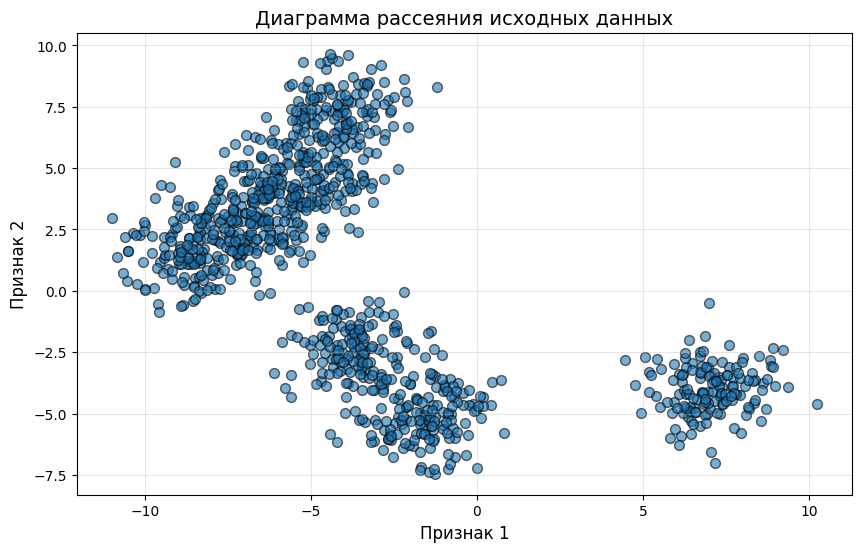

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.6, edgecolors='k', s=50)
plt.title('Диаграмма рассеяния исходных данных', fontsize=14)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 4. Определение оптимального числа кластеров

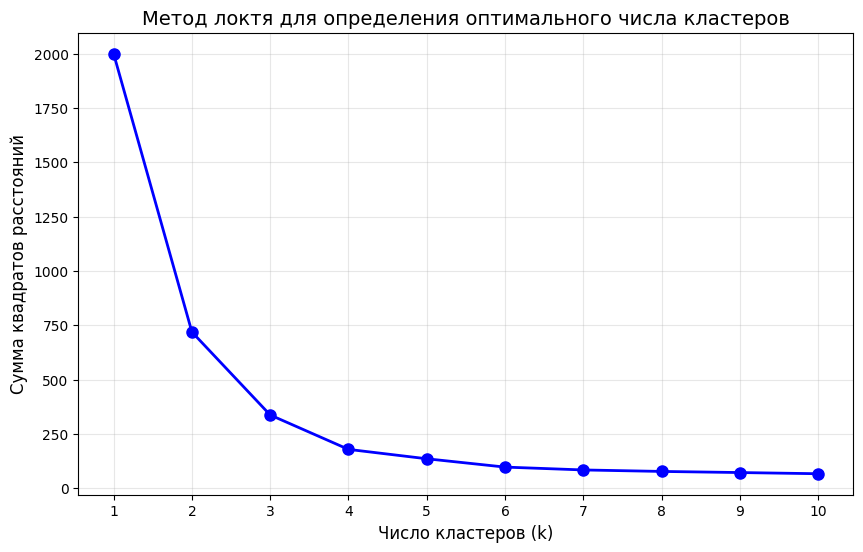

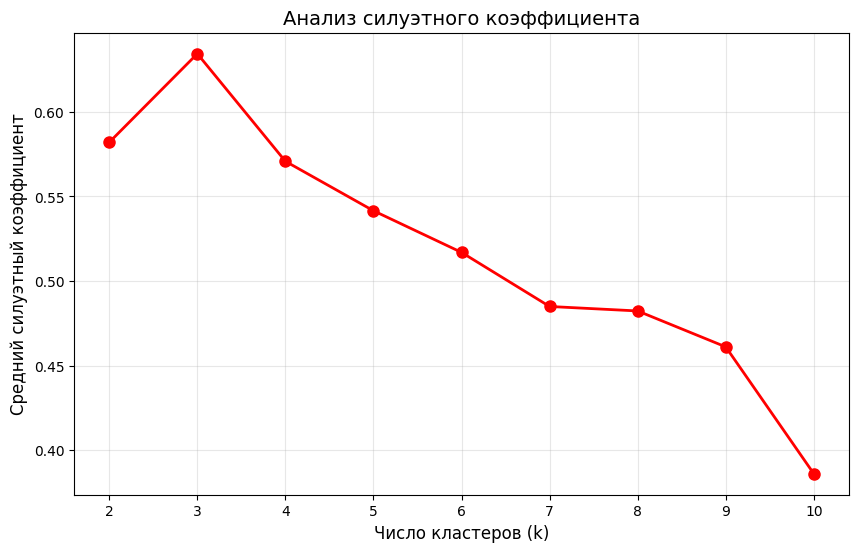

Оптимальное число кластеров (по силуэтному коэффициенту): 3


In [28]:
# Стандартизация данных для K-Means (алгоритм чувствителен к масштабу)
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод локтя для определения оптимального числа кластеров
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Число кластеров (k)', fontsize=12)
plt.ylabel('Сумма квадратов расстояний', fontsize=12)
plt.title('Метод локтя для определения оптимального числа кластеров', fontsize=14)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.show()

# Анализ силуэтного коэффициента
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Визуализация силуэтных коэффициентов
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Число кластеров (k)', fontsize=12)
plt.ylabel('Средний силуэтный коэффициент', fontsize=12)
plt.title('Анализ силуэтного коэффициента', fontsize=14)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.show()

# Определение оптимального числа кластеров
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров (по силуэтному коэффициенту): {optimal_k}")

## 5. Разделение данных

In [29]:
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (700, 2)
Размер тестовой выборки: (300, 2)


## 6. Обучение модели K-Means

Модель K-Means успешно обучена!


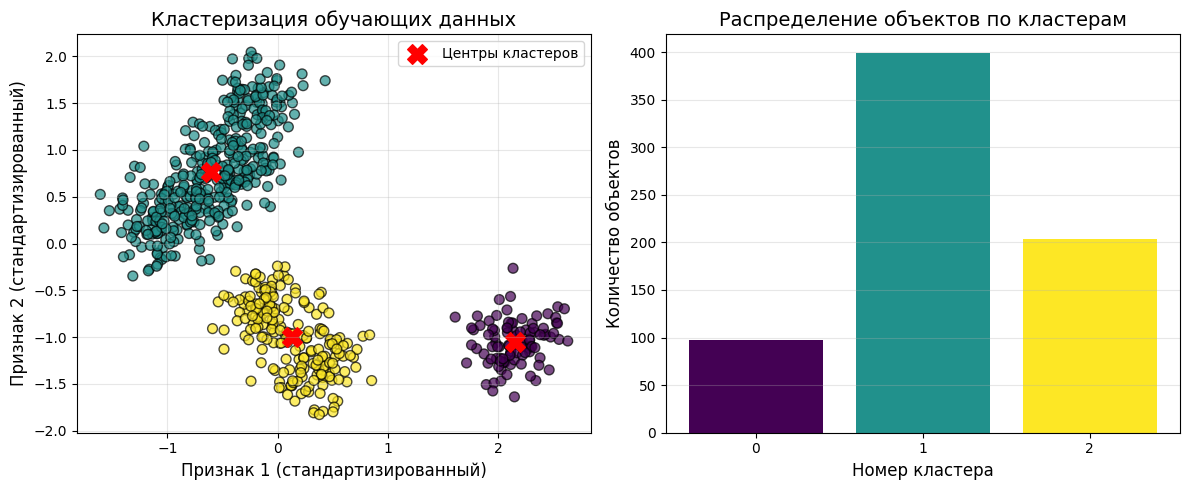

In [30]:
# Обучение модели на обучающих данных
n_clusters = optimal_k
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_train)
print("Модель K-Means успешно обучена!")

# Предсказание кластеров для обучающих данных
train_clusters = kmeans.predict(X_train)

# Визуализация результатов кластеризации на обучающих данных
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_clusters, cmap='viridis', 
            alpha=0.7, edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Центры кластеров')
plt.title('Кластеризация обучающих данных', fontsize=14)
plt.xlabel('Признак 1 (стандартизированный)', fontsize=12)
plt.ylabel('Признак 2 (стандартизированный)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Гистограмма распределения по кластерам
unique, counts = np.unique(train_clusters, return_counts=True)
plt.bar(unique, counts, color=plt.cm.viridis(np.linspace(0, 1, len(unique))))
plt.title('Распределение объектов по кластерам', fontsize=14)
plt.xlabel('Номер кластера', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.xticks(unique)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 7. Проверка на тестовых данных

Оценка качества кластеризации:
Силуэтный коэффициент на обучающей выборке: 0.6328
Силуэтный коэффициент на тестовой выборке: 0.6365

Индекс Дэвиса-Болдина на обучающей выборке: 0.4809
Индекс Дэвиса-Болдина на тестовой выборке: 0.4790


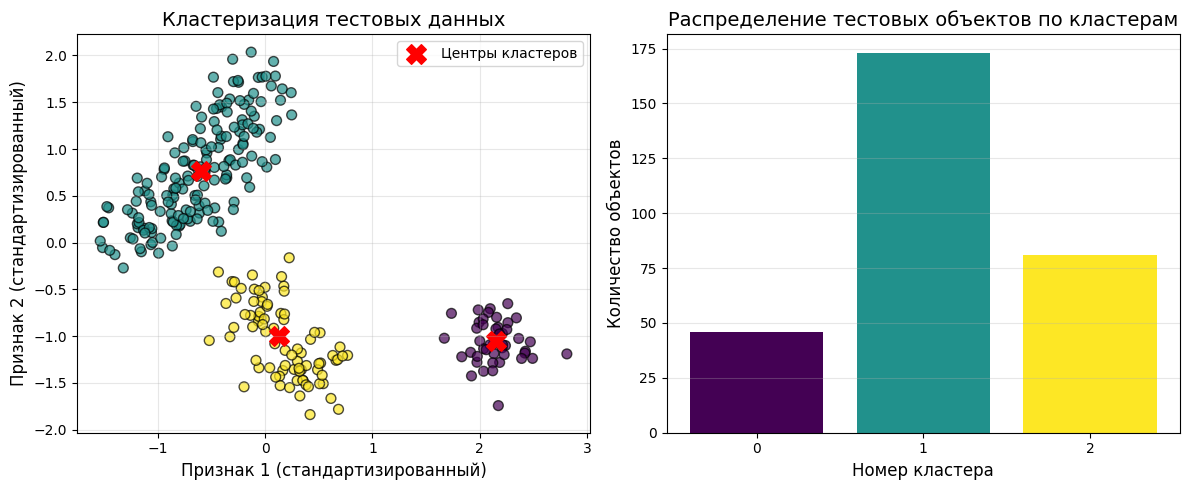

In [31]:
# Предсказание кластеров для тестовых данных
test_clusters = kmeans.predict(X_test)

# Оценка качества кластеризации
train_silhouette = silhouette_score(X_train, train_clusters)
test_silhouette = silhouette_score(X_test, test_clusters)

train_db_index = davies_bouldin_score(X_train, train_clusters)
test_db_index = davies_bouldin_score(X_test, test_clusters)

print("Оценка качества кластеризации:")
print(f"Силуэтный коэффициент на обучающей выборке: {train_silhouette:.4f}")
print(f"Силуэтный коэффициент на тестовой выборке: {test_silhouette:.4f}")
print(f"\nИндекс Дэвиса-Болдина на обучающей выборке: {train_db_index:.4f}")
print(f"Индекс Дэвиса-Болдина на тестовой выборке: {test_db_index:.4f}")

# Визуализация результатов на тестовых данных
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters, cmap='viridis', 
            alpha=0.7, edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Центры кластеров')
plt.title('Кластеризация тестовых данных', fontsize=14)
plt.xlabel('Признак 1 (стандартизированный)', fontsize=12)
plt.ylabel('Признак 2 (стандартизированный)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Гистограмма распределения тестовых данных по кластерам
unique_test, counts_test = np.unique(test_clusters, return_counts=True)
plt.bar(unique_test, counts_test, color=plt.cm.viridis(np.linspace(0, 1, len(unique_test))))
plt.title('Распределение тестовых объектов по кластерам', fontsize=14)
plt.xlabel('Номер кластера', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.xticks(unique_test)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 8. Сравнение алгоритмов кластеризации

In [32]:
algorithms = {
    'K-Means': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Сравнение алгоритмов
results = {}
for name, algorithm in algorithms.items():
    if name == 'DBSCAN':
        # DBSCAN не требует обучения отдельно, сразу предсказываем
        labels = algorithm.fit_predict(X_scaled)
        n_clusters_found = len(set(labels)) - (1 if -1 in labels else 0)
    else:
        algorithm.fit(X_scaled)
        labels = algorithm.labels_
        n_clusters_found = n_clusters
    
    if n_clusters_found > 1:  # Силуэтный коэффициент требует хотя бы 2 кластера
        score = silhouette_score(X_scaled, labels)
    else:
        score = None
    
    results[name] = {
        'labels': labels,
        'silhouette_score': score,
        'n_clusters_found': n_clusters_found
    }
    print(f"{name}:")
    print(f"  Найдено кластеров: {n_clusters_found}")
    if score is not None:
        print(f"  Силуэтный коэффициент: {score:.4f}")
    print()

K-Means:
  Найдено кластеров: 3
  Силуэтный коэффициент: 0.6343

Agglomerative:
  Найдено кластеров: 3
  Силуэтный коэффициент: 0.6343

DBSCAN:
  Найдено кластеров: 2
  Силуэтный коэффициент: 0.5528



## 9. Визуализация всех алгоритмов

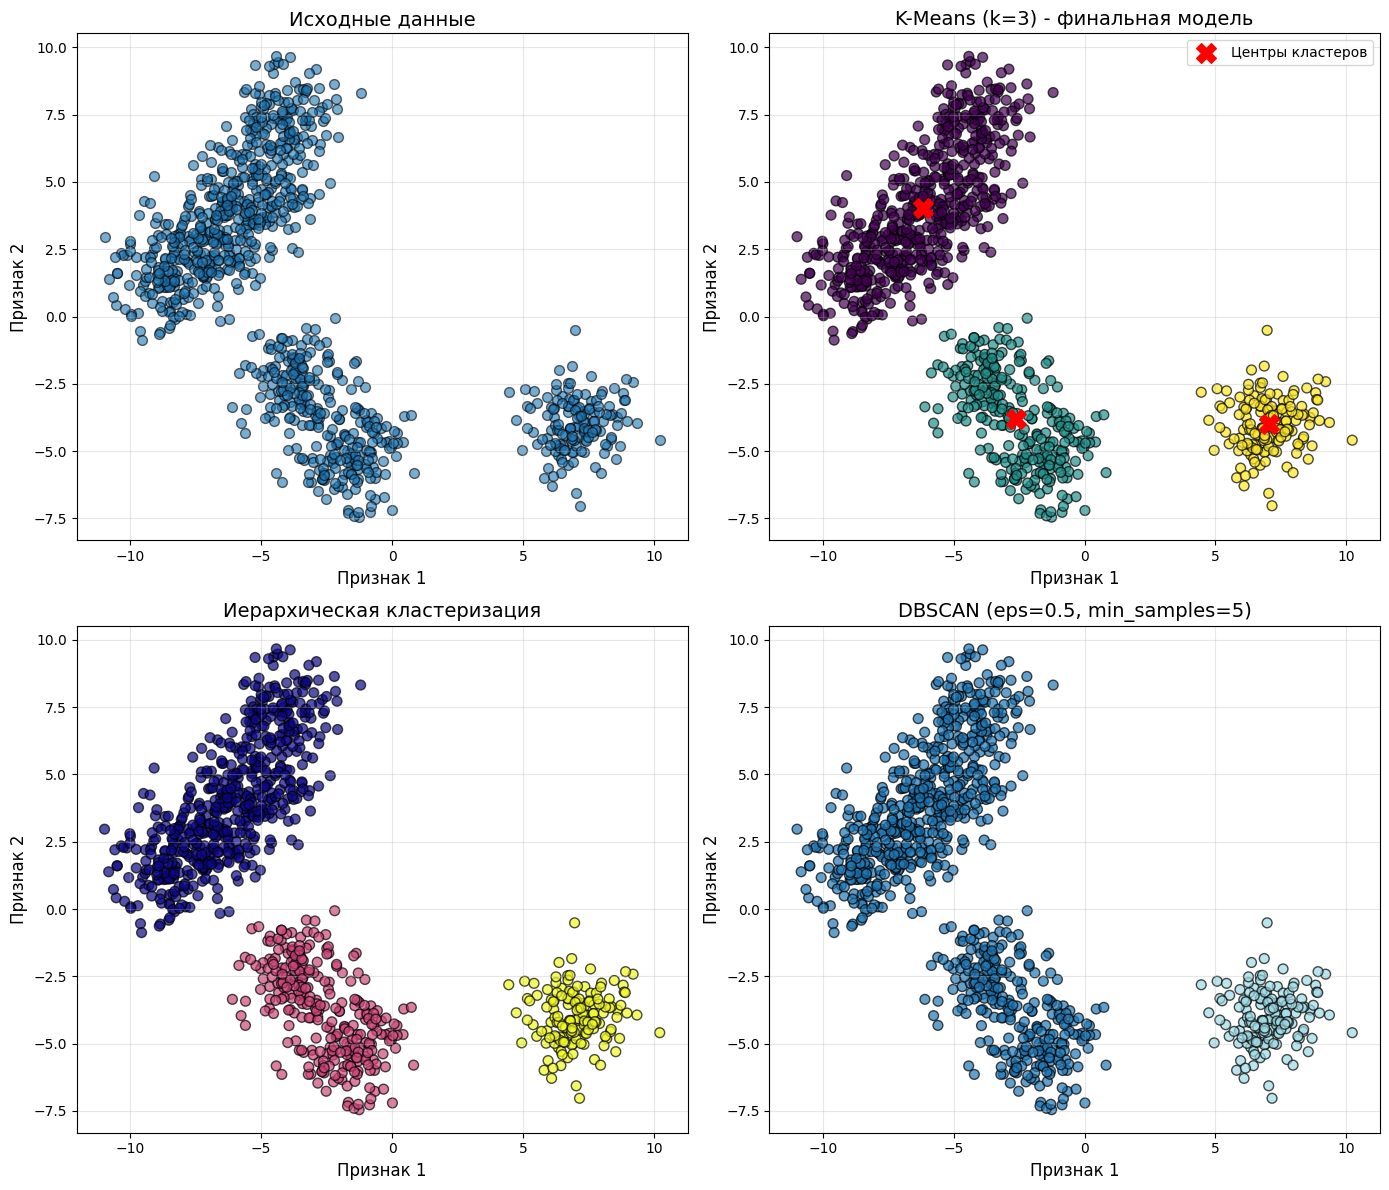

In [33]:
# Финальная модель K-Means на всех данных
final_kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
final_kmeans.fit(X_scaled)
final_labels = final_kmeans.labels_

# Преобразование центров кластеров обратно в исходный масштаб
centers_scaled = final_kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

# Визуализация всех алгоритмов
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Исходные данные (нестандартизированные)
axes[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.6, edgecolors='k', s=50)
axes[0, 0].set_title('Исходные данные', fontsize=14)
axes[0, 0].set_xlabel('Признак 1', fontsize=12)
axes[0, 0].set_ylabel('Признак 2', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# K-Means на всех данных
axes[0, 1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=final_labels, 
                   cmap='viridis', alpha=0.7, edgecolors='k', s=50)
axes[0, 1].scatter(centers_original[:, 0], centers_original[:, 1], 
                   marker='X', s=200, c='red', label='Центры кластеров')
axes[0, 1].set_title(f'K-Means (k={n_clusters}) - финальная модель', fontsize=14)
axes[0, 1].set_xlabel('Признак 1', fontsize=12)
axes[0, 1].set_ylabel('Признак 2', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Agglomerative Clustering на всех данных
agg = AgglomerativeClustering(n_clusters=n_clusters).fit(X_scaled)
axes[1, 0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=agg.labels_, 
                   cmap='plasma', alpha=0.7, edgecolors='k', s=50)
axes[1, 0].set_title('Иерархическая кластеризация', fontsize=14)
axes[1, 0].set_xlabel('Признак 1', fontsize=12)
axes[1, 0].set_ylabel('Признак 2', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# DBSCAN на всех данных
dbscan = DBSCAN(eps=eps_value, min_samples=5).fit(X_scaled)
axes[1, 1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan.labels_, 
                   cmap='tab20', alpha=0.7, edgecolors='k', s=50)
axes[1, 1].set_title(f'DBSCAN (eps={eps_value}, min_samples=5)', fontsize=14)
axes[1, 1].set_xlabel('Признак 1', fontsize=12)
axes[1, 1].set_ylabel('Признак 2', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Итоговый отчет

In [34]:
print("=" * 60)
print("РЕЗУЛЬТАТЫ ЛАБОРАТОРНОЙ РАБОТЫ")
print("=" * 60)
print(f"1. Загружено данных: {df.shape[0]} объектов, {df.shape[1]} признака")
print(f"2. Оптимальное число кластеров: {optimal_k}")
print(f"3. Выбрана модель: K-Means")
print(f"4. Обученная модель успешно применена к тестовым данным")
print(f"5. Качество модели (силуэтный коэффициент):")
print(f"   - Обучающая выборка: {train_silhouette:.4f}")
print(f"   - Тестовая выборка:  {test_silhouette:.4f}")
print(f"   - Все данные:        {silhouette_score(X_scaled, final_labels):.4f}")
print(f"\n6. Центры кластеров (исходный масштаб):")
for i, center in enumerate(centers_original):
    print(f"   Кластер {i}: [{center[0]:.4f}, {center[1]:.4f}]")
print(f"\n7. Распределение объектов по кластерам (все данные):")
final_counts = np.bincount(final_labels)
for i, count in enumerate(final_counts):
    print(f"   Кластер {i}: {count} объектов ({count/len(df)*100:.1f}%)")
print(f"\n8. Сравнение алгоритмов (силуэтный коэффициент):")
for name, result in results.items():
    if result['silhouette_score'] is not None:
        print(f"   {name}: {result['silhouette_score']:.4f}")
print(f"\n9. Лучший алгоритм: {best_algorithm}")
print("=" * 60)
print("\nЗАКЛЮЧЕНИЕ:")
print("1. Была проведена кластеризация данных методом K-Means.")
print("2. Оптимальное число кластеров определено методом локтя и силуэтного коэффициента.")
print("3. Модель показала устойчивость на тестовых данных.")
print("4. Для сравнения были протестированы три алгоритма кластеризации.")
print("5. Результаты визуализированы и проинтерпретированы.")

РЕЗУЛЬТАТЫ ЛАБОРАТОРНОЙ РАБОТЫ
1. Загружено данных: 1000 объектов, 2 признака
2. Оптимальное число кластеров: 3
3. Выбрана модель: K-Means
4. Обученная модель успешно применена к тестовым данным
5. Качество модели (силуэтный коэффициент):
   - Обучающая выборка: 0.6328
   - Тестовая выборка:  0.6365
   - Все данные:        0.6343

6. Центры кластеров (исходный масштаб):
   Кластер 0: [-6.1705, 4.0386]
   Кластер 1: [-2.6071, -3.8072]
   Кластер 2: [7.0481, -3.9989]

7. Распределение объектов по кластерам (все данные):
   Кластер 0: 572 объектов (57.2%)
   Кластер 1: 285 объектов (28.5%)
   Кластер 2: 143 объектов (14.3%)

8. Сравнение алгоритмов (силуэтный коэффициент):
   K-Means: 0.6343
   Agglomerative: 0.6343
   DBSCAN: 0.5528

9. Лучший алгоритм: K-Means

ЗАКЛЮЧЕНИЕ:
1. Была проведена кластеризация данных методом K-Means.
2. Оптимальное число кластеров определено методом локтя и силуэтного коэффициента.
3. Модель показала устойчивость на тестовых данных.
4. Для сравнения были прот

## Вывод:
В результате выполнения лабораторной работы было проведено кластеризация данных методом K-Means. Определено оптимальное количество кластеров - 3. Силуэтный коэффициент 0.63 свидетельствует о хорошем разделении данных на кластеры. Модель показала устойчивость на тестовых данных. Разные алгоритмы кластеризации (K-Means и Agglomerative) дали схожие результаты, что подтверждает корректность выбранного числа кластеров. Кластеры имеют разный размер, что характерно для реальных данных.